In [1]:
from sympy import *
init_printing()

In [2]:
theta1,theta2,theta3,theta4=symbols('theta1 theta2 theta3 theta4 ')
w1,w2,gamma1,gamma2,n1,n2,g=symbols('w1 w2 gamma1 gamma2  n1 n2 g',real=True)
lambda1=Symbol('lambda',real=True)

In [3]:
maw=-I*Matrix([[w1,lambda1],[-lambda1,-w1]])-(gamma1/2)*Matrix([[1,0],[0,1]])
maw

⎡  γ₁                    ⎤
⎢- ── - ⅈ⋅w₁     -ⅈ⋅λ    ⎥
⎢  2                     ⎥
⎢                        ⎥
⎢               γ₁       ⎥
⎢    ⅈ⋅λ      - ── + ⅈ⋅w₁⎥
⎣               2        ⎦

In [4]:
otras=Matrix([[theta1,theta2],[theta3,theta4]])
otras

⎡θ₁  θ₂⎤
⎢      ⎥
⎣θ₃  θ₄⎦

In [5]:
Eqs=maw*otras+otras*conjugate(maw.T)

In [6]:
F1=gamma1*(n1+ 1/2)* Matrix([[1,0],[0,1]])
F2=gamma2*(n2+ 1/2)* Matrix([[1,0],[0,1]])


In [7]:
sols=solve(Eqs+F1,otras,rational=False,simplify=False)
solus=Matrix([[sols[otras[0]],sols[otras[1]]],[sols[otras[2]],sols[otras[3]]]])

In [8]:
gaga = gcd(tuple(solus))

A_v2 = MatMul(nsimplify(gaga),(nsimplify(solus)/nsimplify(gaga)),evaluate = False)


In [9]:
simplify(A_v2)

                       ⎡     2        2                      ⎤
       2⋅n₁ + 1        ⎢ 4⋅γ₁  + 16⋅w₁     -8⋅λ⋅(ⅈ⋅γ₁ + 2⋅w₁)⎥
──────────────────────⋅⎢                                     ⎥
  ⎛  2      2       2⎞ ⎢                         2        2  ⎥
8⋅⎝γ₁  - 4⋅λ  + 4⋅w₁ ⎠ ⎣8⋅λ⋅(ⅈ⋅γ₁ - 2⋅w₁)    4⋅γ₁  + 16⋅w₁   ⎦

In [10]:
A_v2.shape

In [11]:
def LyapunovSS(W,F):
    x,y=W.shape
    x1,y1=F.shape
    sols=eye(x)
    if x==y:
        if x1==y1:
            if x1==y:
                theta=symbols('Theta1:'+str((y+1)**2 +1))
                otra=eye(y)
                for i in range((y)**2):
                    otra[i]=theta[i]
                Eq=W*otra+otra*conjugate(W.T)
                sols=solve(Eq+F,otra,rational=False,simplify=False,quick=True)
                for i in range(y**2):
                    otra[i]=sols[otra[i]]
                #g = gcd(tuple(otra))
                #A_v2 = MatMul(nsimplify(g),(nsimplify(otra)/nsimplify(g)),evaluate = False)
            else:
                print('The input matrices are not the same shape')
        else:
            print('One of the input matrices is not a square matrix')
    return simplify(otra)
                
        

In [12]:
LyapunovSS(maw,F1)

⎡     ⎛      2            2            2         2⎞                           
⎢ 1.0⋅⎝1.0⋅γ₁ ⋅n₁ + 0.5⋅γ₁  + 4.0⋅n₁⋅w₁  + 2.0⋅w₁ ⎠   -1.0⋅λ⋅(2.0⋅ⅈ⋅γ₁⋅n₁ + 1.
⎢ ─────────────────────────────────────────────────   ────────────────────────
⎢                   2        2         2                                  2   
⎢             1.0⋅γ₁  - 4.0⋅λ  + 4.0⋅w₁                             1.0⋅γ₁  - 
⎢                                                                             
⎢                                                           ⎛      2          
⎢1.0⋅λ⋅(2.0⋅ⅈ⋅γ₁⋅n₁ + 1.0⋅ⅈ⋅γ₁ - 4.0⋅n₁⋅w₁ - 2.0⋅w₁)    1.0⋅⎝1.0⋅γ₁ ⋅n₁ + 0.5⋅
⎢───────────────────────────────────────────────────    ──────────────────────
⎢                   2        2         2                                  2   
⎣             1.0⋅γ₁  - 4.0⋅λ  + 4.0⋅w₁                             1.0⋅γ₁  - 

                             ⎤
0⋅ⅈ⋅γ₁ + 4.0⋅n₁⋅w₁ + 2.0⋅w₁) ⎥
─────────────────────────────⎥
     2         2             ⎥
4.0⋅λ 

In [13]:
e=Matrix([[-I*w1,0,-I*g,0],[0,I*w1,0,I*conjugate(g)],[-I*conjugate(g),0,-I*w1,0],[0,I*g,0,I*w1]])
e

⎡-ⅈ⋅w₁   0    -ⅈ⋅g    0  ⎤
⎢                        ⎥
⎢  0    ⅈ⋅w₁    0    ⅈ⋅g ⎥
⎢                        ⎥
⎢-ⅈ⋅g    0    -ⅈ⋅w₁   0  ⎥
⎢                        ⎥
⎣  0    ⅈ⋅g     0    ⅈ⋅w₁⎦

In [14]:
f=Matrix([[-gamma1/2,0,0,0],[0,-gamma1/2,0,0],[0,0,-gamma1/2,0],[0,0,0,-gamma1/2]])
f

⎡-γ₁                   ⎤
⎢────   0     0     0  ⎥
⎢ 2                    ⎥
⎢                      ⎥
⎢      -γ₁             ⎥
⎢ 0    ────   0     0  ⎥
⎢       2              ⎥
⎢                      ⎥
⎢            -γ₁       ⎥
⎢ 0     0    ────   0  ⎥
⎢             2        ⎥
⎢                      ⎥
⎢                  -γ₁ ⎥
⎢ 0     0     0    ────⎥
⎣                   2  ⎦

In [15]:
W=e+f
W

⎡  γ₁                                              ⎤
⎢- ── - ⅈ⋅w₁       0          -ⅈ⋅g           0     ⎥
⎢  2                                               ⎥
⎢                                                  ⎥
⎢               γ₁                                 ⎥
⎢     0       - ── + ⅈ⋅w₁       0           ⅈ⋅g    ⎥
⎢               2                                  ⎥
⎢                                                  ⎥
⎢                            γ₁                    ⎥
⎢   -ⅈ⋅g           0       - ── - ⅈ⋅w₁       0     ⎥
⎢                            2                     ⎥
⎢                                                  ⎥
⎢                                         γ₁       ⎥
⎢     0           ⅈ⋅g           0       - ── + ⅈ⋅w₁⎥
⎣                                         2        ⎦

In [16]:
F= Matrix([[gamma1*(n1+ 1/2),0,0,0],[0,gamma1*(n1+ 1/2),0,0],[0,0,gamma1*(n2+ 1/2),0],[0,0,0,gamma1*(n2+ 1/2)]])
F

⎡γ₁⋅(n₁ + 0.5)        0              0              0      ⎤
⎢                                                          ⎥
⎢      0        γ₁⋅(n₁ + 0.5)        0              0      ⎥
⎢                                                          ⎥
⎢      0              0        γ₁⋅(n₂ + 0.5)        0      ⎥
⎢                                                          ⎥
⎣      0              0              0        γ₁⋅(n₂ + 0.5)⎦

In [17]:
sol=LyapunovSS(W,F)

In [20]:
simplify(sol,rational=true)     

⎡                                      2                                      
⎢   2         2         2     2      γ₁                                       
⎢2⋅g ⋅n₁ + 2⋅g ⋅n₂ + 2⋅g  + γ₁ ⋅n₁ + ───                                      
⎢                                     2                                       
⎢───────────────────────────────────────                     0                
⎢                  2     2                                                    
⎢               4⋅g  + γ₁                                                     
⎢                                                                             
⎢                                                                             
⎢                                            2         2         2     2      
⎢                                         2⋅g ⋅n₁ + 2⋅g ⋅n₂ + 2⋅g  + γ₁ ⋅n₁ + 
⎢                                                                             
⎢                   0                     ──────────

# To put it in the form of the  the paper the diagonal elements need to be further simplified, since there are only two different elements in the Diagonal we just simplify those, we need to substract $\frac{1}{2}$ and add a zero $n_{1}-n_{1}$ or $n_{1}-n_{1}$ respectively,we start by obtaining $\langle a^{\dagger}_{1} a_{1}\rangle$

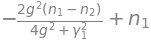

In [23]:
expr1=simplify(sol[0]-n1-1/2,rational=True)
n1+expr1

# We do the same to obtain $\langle a^{\dagger}_{2} a_{2}\rangle$

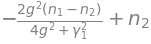

In [24]:
expr2=simplify(sol[15]-n2-1/2,rational=True)
n2+expr1

# The cross terms can be seen directly from the matrix  $\langle a^{\dagger}_{2} a_{2}\rangle$

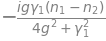

In [25]:
sol[8]

# TO DO: do this procedure using symengine or some faster way to pull so this can be added to sympy natively